2

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.00      0.00      2498
       Relay       0.46      1.00      0.63      2166

    accuracy                           0.46      4664
   macro avg       0.73      0.50      0.32      4664
weighted avg       0.75      0.46      0.30      4664



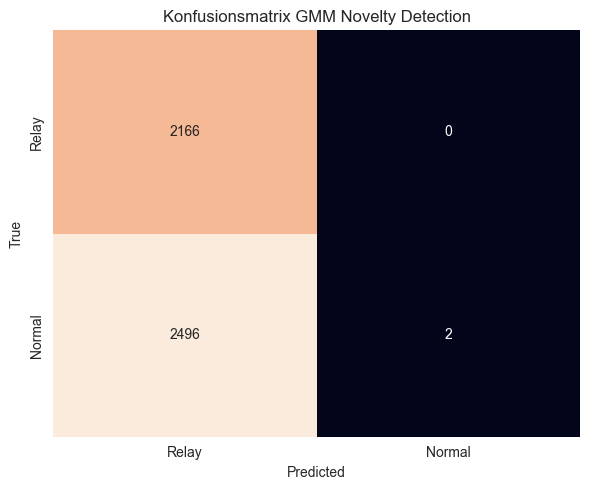

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.71      0.66      0.68      2498
       Relay       0.64      0.68      0.66      2166

    accuracy                           0.67      4664
   macro avg       0.67      0.67      0.67      4664
weighted avg       0.67      0.67      0.67      4664



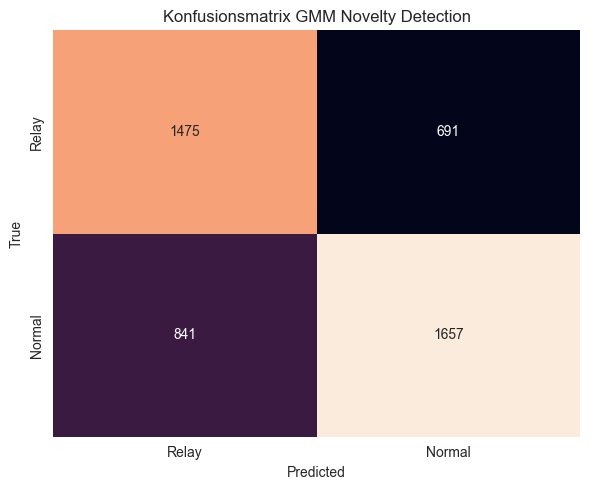

4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.68      0.74      0.71      2498
       Relay       0.66      0.59      0.63      2166

    accuracy                           0.67      4664
   macro avg       0.67      0.67      0.67      4664
weighted avg       0.67      0.67      0.67      4664



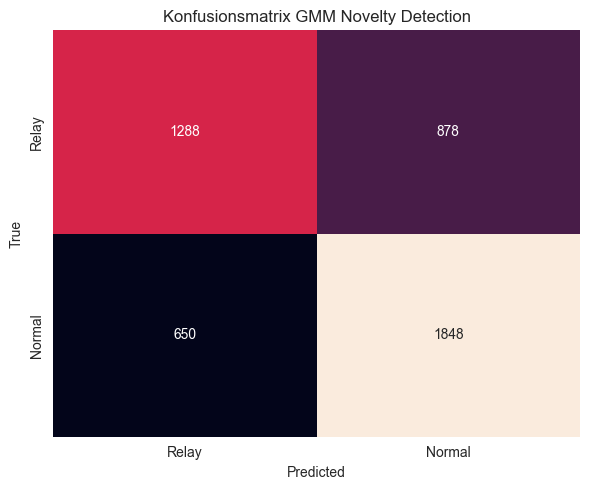

5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.67      0.79      0.72      2498
       Relay       0.69      0.56      0.62      2166

    accuracy                           0.68      4664
   macro avg       0.68      0.67      0.67      4664
weighted avg       0.68      0.68      0.67      4664



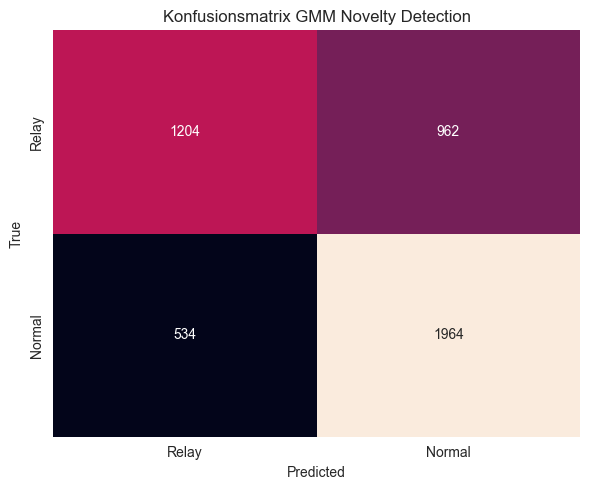

7

Classification Report:
               precision    recall  f1-score   support

      Normal       0.65      0.83      0.73      2498
       Relay       0.71      0.48      0.57      2166

    accuracy                           0.67      4664
   macro avg       0.68      0.65      0.65      4664
weighted avg       0.68      0.67      0.66      4664



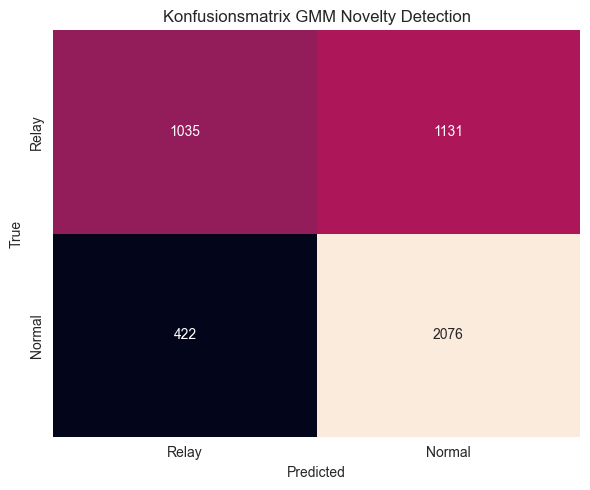

10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.83      0.71      2498
       Relay       0.68      0.42      0.52      2166

    accuracy                           0.64      4664
   macro avg       0.65      0.62      0.61      4664
weighted avg       0.65      0.64      0.62      4664



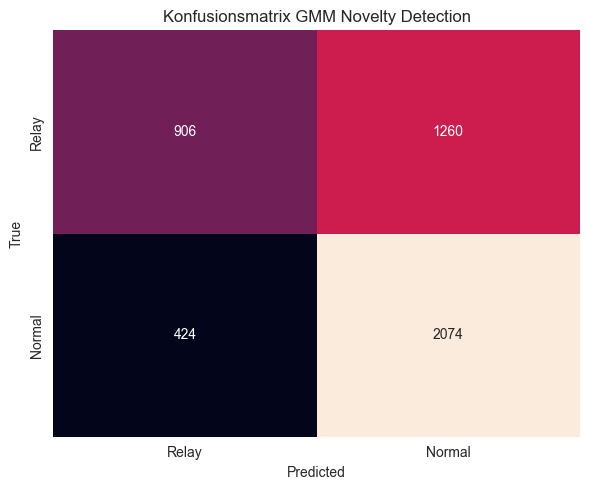

15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.92      0.74      2498
       Relay       0.79      0.33      0.47      2166

    accuracy                           0.65      4664
   macro avg       0.70      0.63      0.60      4664
weighted avg       0.69      0.65      0.61      4664



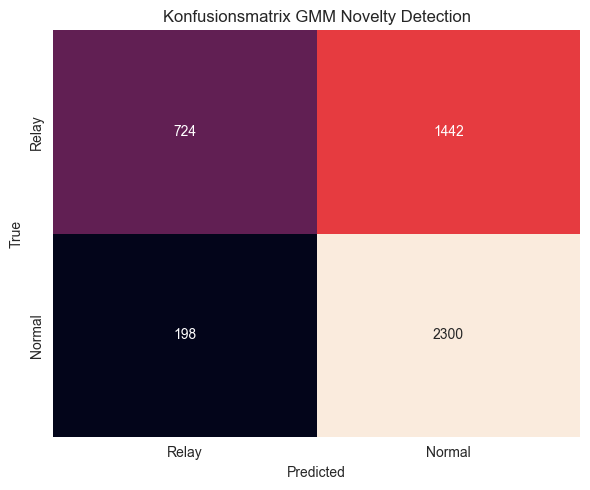

'SCALED DATEN AM BESTEN'

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.lunar import LUNAR

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3, 4, 5, 7, 10, 15}:
    clf = LUNAR(contamination=len(X_test_relay)/len(X_test_combined), n_neighbours=n)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.79      0.21      0.34      2498
       Relay       0.51      0.94      0.66      2166

    accuracy                           0.55      4664
   macro avg       0.65      0.57      0.50      4664
weighted avg       0.66      0.55      0.49      4664



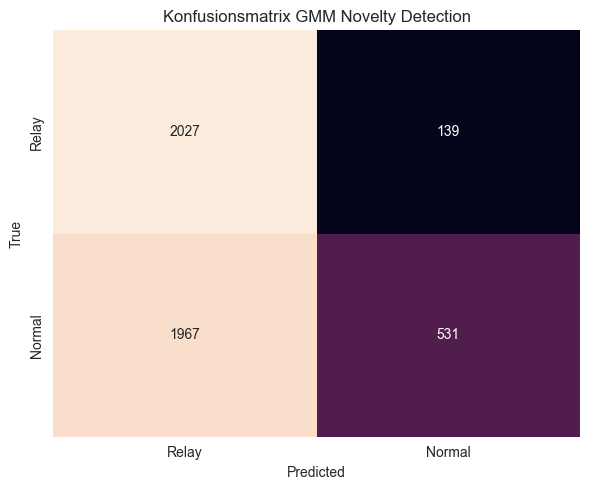

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.67      0.65      0.66      2498
       Relay       0.61      0.63      0.62      2166

    accuracy                           0.64      4664
   macro avg       0.64      0.64      0.64      4664
weighted avg       0.64      0.64      0.64      4664



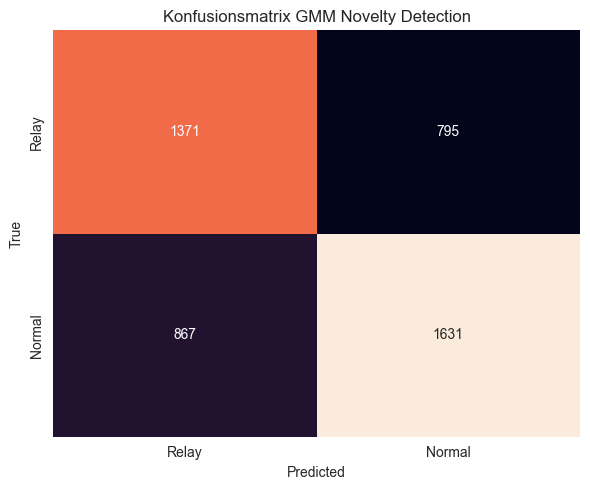

4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.68      0.74      0.71      2498
       Relay       0.66      0.60      0.63      2166

    accuracy                           0.67      4664
   macro avg       0.67      0.67      0.67      4664
weighted avg       0.67      0.67      0.67      4664



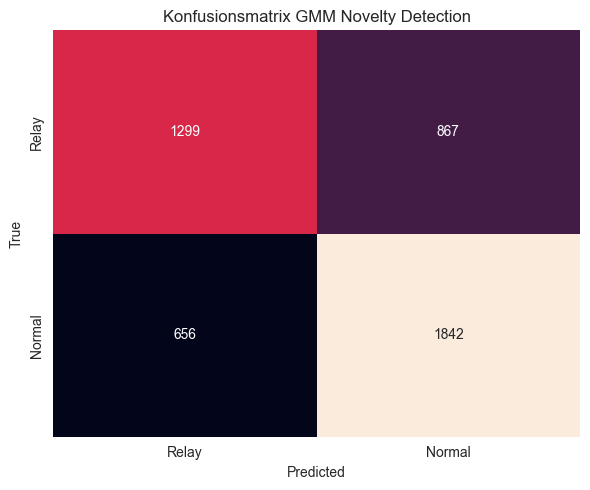

5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.64      0.75      0.69      2498
       Relay       0.64      0.51      0.57      2166

    accuracy                           0.64      4664
   macro avg       0.64      0.63      0.63      4664
weighted avg       0.64      0.64      0.63      4664



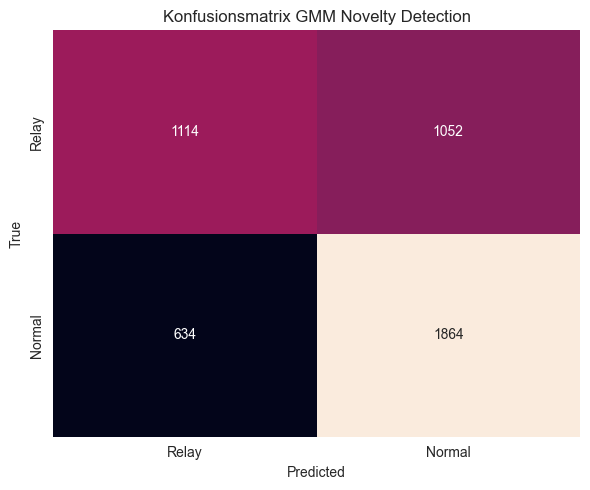

7

Classification Report:
               precision    recall  f1-score   support

      Normal       0.65      0.84      0.73      2498
       Relay       0.72      0.47      0.57      2166

    accuracy                           0.67      4664
   macro avg       0.68      0.65      0.65      4664
weighted avg       0.68      0.67      0.65      4664



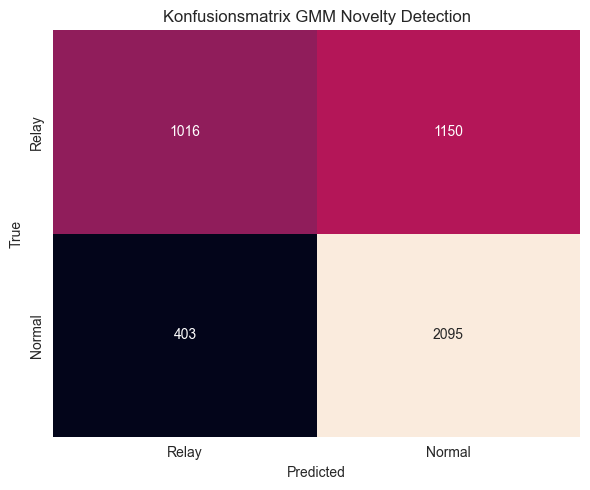

10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.88      0.73      2498
       Relay       0.75      0.40      0.52      2166

    accuracy                           0.66      4664
   macro avg       0.69      0.64      0.63      4664
weighted avg       0.68      0.66      0.63      4664



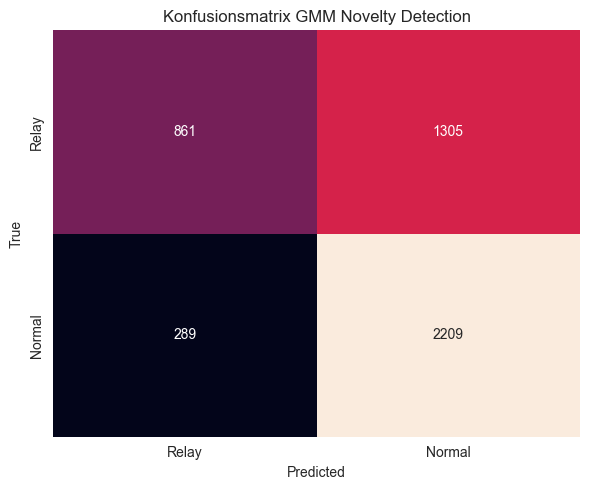

15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.91      0.74      2498
       Relay       0.77      0.35      0.48      2166

    accuracy                           0.65      4664
   macro avg       0.70      0.63      0.61      4664
weighted avg       0.69      0.65      0.62      4664



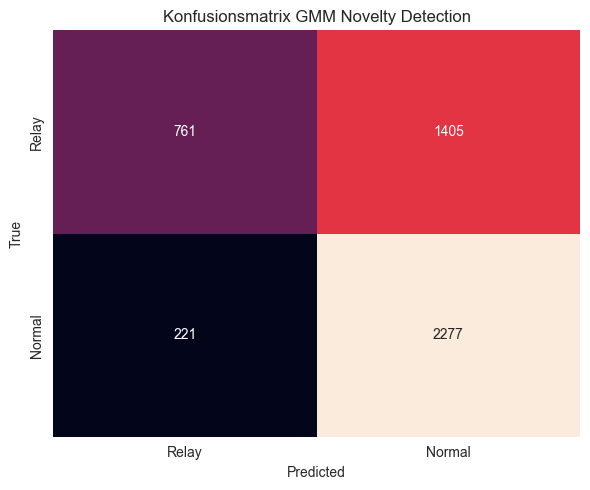

'SCALED DATEN AM BESTEN'

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.lunar import LUNAR

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3, 4, 5, 7, 10, 15}:
    clf = LUNAR(contamination=len(X_test_relay)/len(X_test_combined), n_neighbours=n)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.88      0.72      2498
       Relay       0.71      0.33      0.45      2166

    accuracy                           0.63      4664
   macro avg       0.66      0.61      0.59      4664
weighted avg       0.65      0.63      0.60      4664



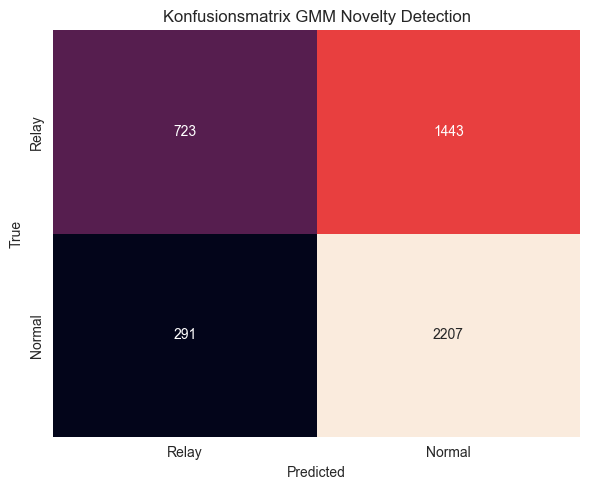

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2498
       Relay       0.91      0.10      0.18      2166

    accuracy                           0.58      4664
   macro avg       0.73      0.54      0.45      4664
weighted avg       0.72      0.58      0.47      4664



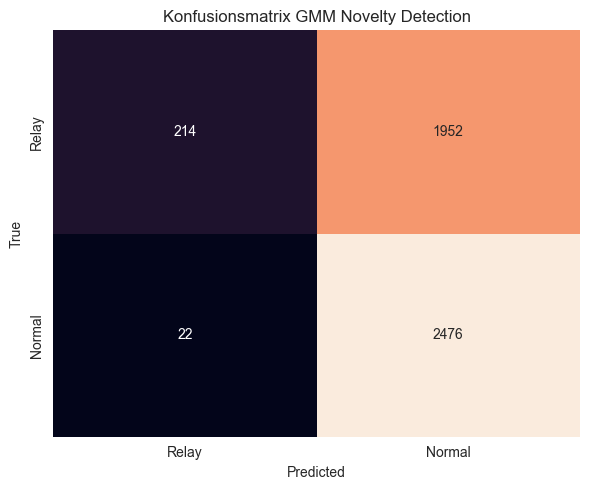

4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2498
       Relay       0.88      0.07      0.13      2166

    accuracy                           0.56      4664
   macro avg       0.72      0.53      0.42      4664
weighted avg       0.71      0.56      0.44      4664



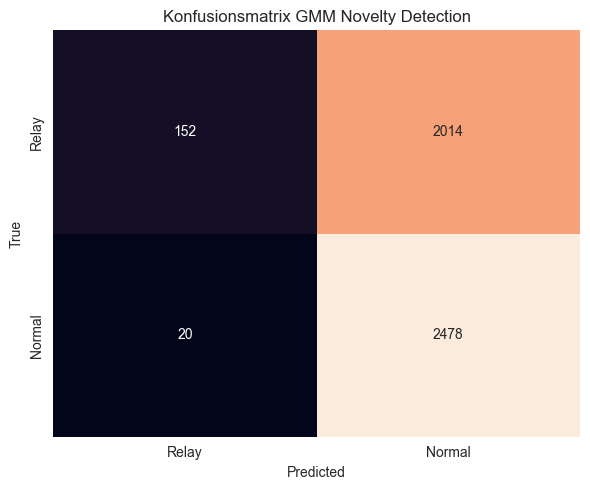

5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2498
       Relay       0.90      0.06      0.11      2166

    accuracy                           0.56      4664
   macro avg       0.72      0.53      0.41      4664
weighted avg       0.71      0.56      0.43      4664



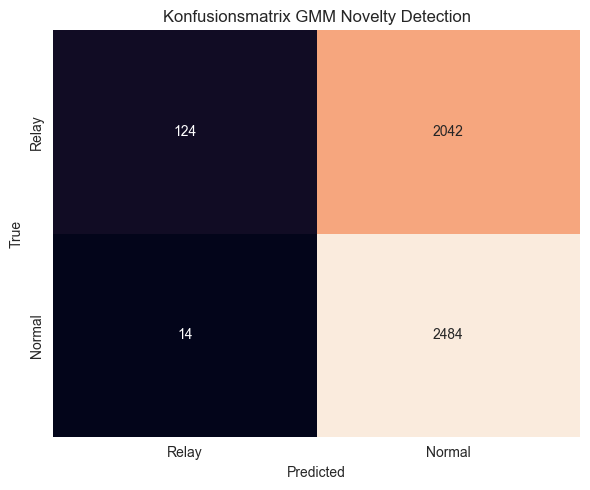

7

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      1.00      0.71      2498
       Relay       0.91      0.05      0.10      2166

    accuracy                           0.56      4664
   macro avg       0.73      0.52      0.40      4664
weighted avg       0.72      0.56      0.43      4664



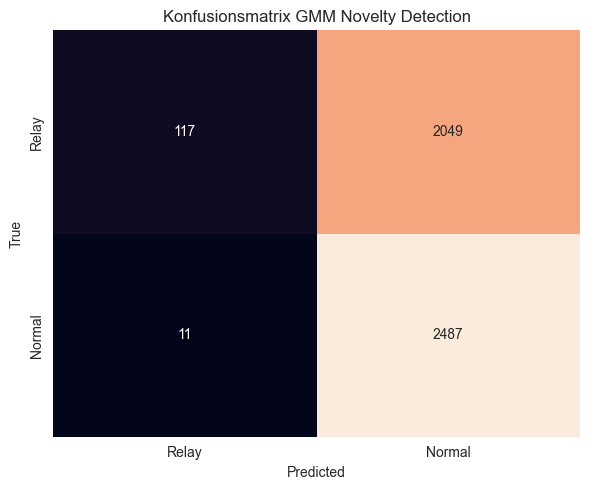

10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      1.00      0.70      2498
       Relay       0.94      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.74      0.52      0.39      4664
weighted avg       0.73      0.55      0.41      4664



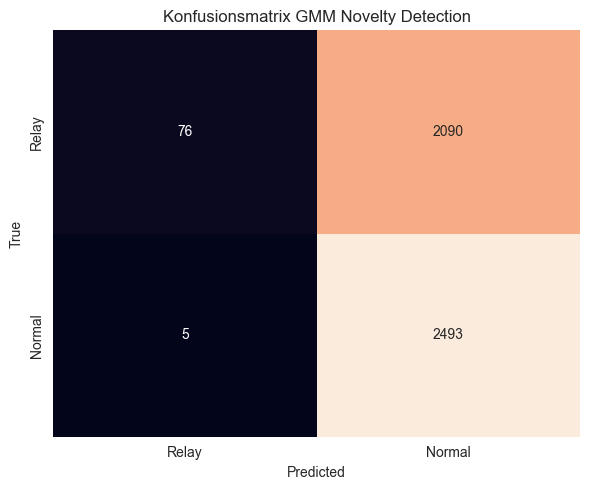

15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      1.00      0.70      2498
       Relay       0.93      0.03      0.06      2166

    accuracy                           0.55      4664
   macro avg       0.74      0.51      0.38      4664
weighted avg       0.72      0.55      0.40      4664



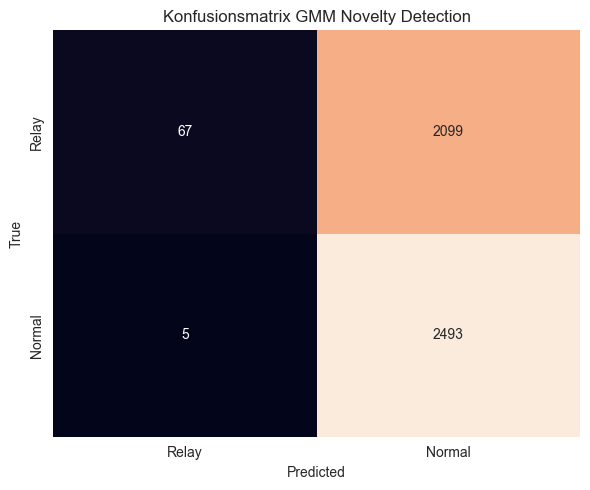

'SCALED DATEN AM BESTEN'

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.lunar import LUNAR

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3}:
    clf = LUNAR(contamination=0.01, n_neighbours=n)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.91      0.74      2498
       Relay       0.78      0.39      0.52      2166

    accuracy                           0.66      4664
   macro avg       0.70      0.65      0.63      4664
weighted avg       0.70      0.66      0.64      4664



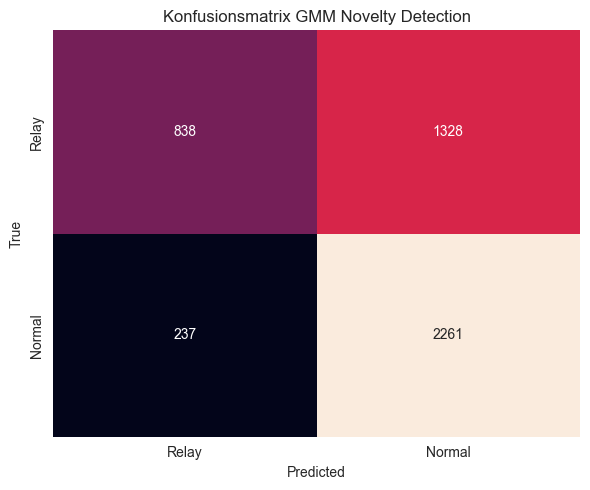

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2498
       Relay       0.90      0.09      0.17      2166

    accuracy                           0.57      4664
   macro avg       0.73      0.54      0.44      4664
weighted avg       0.72      0.57      0.46      4664



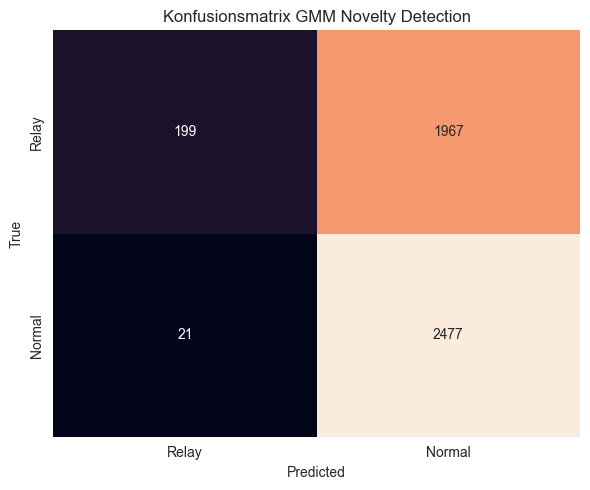

4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2498
       Relay       0.89      0.07      0.13      2166

    accuracy                           0.56      4664
   macro avg       0.72      0.53      0.42      4664
weighted avg       0.71      0.56      0.44      4664



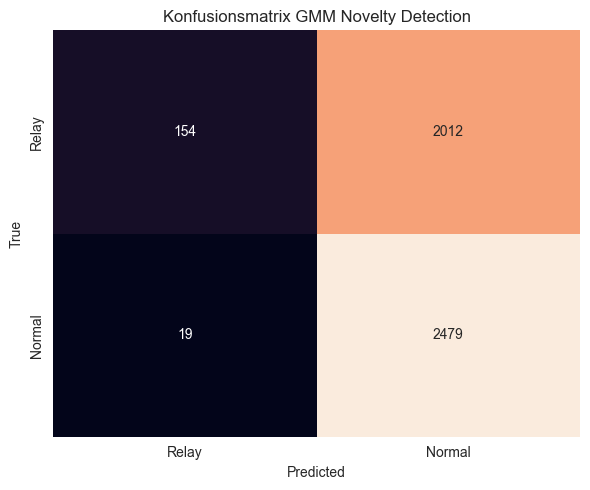

5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2498
       Relay       0.90      0.06      0.11      2166

    accuracy                           0.56      4664
   macro avg       0.72      0.53      0.41      4664
weighted avg       0.71      0.56      0.43      4664



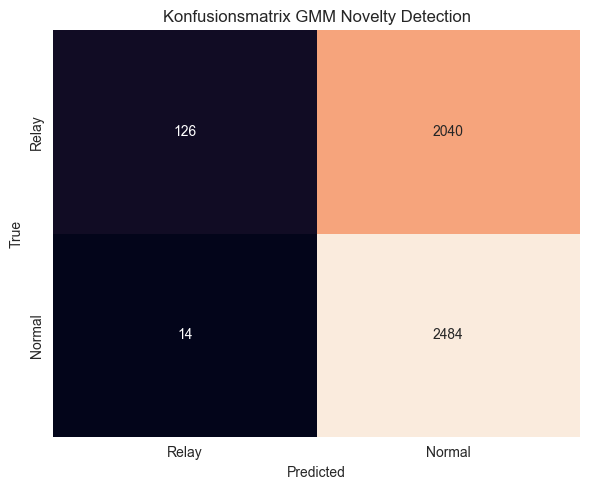

7

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      1.00      0.71      2498
       Relay       0.92      0.06      0.11      2166

    accuracy                           0.56      4664
   macro avg       0.73      0.53      0.41      4664
weighted avg       0.72      0.56      0.43      4664



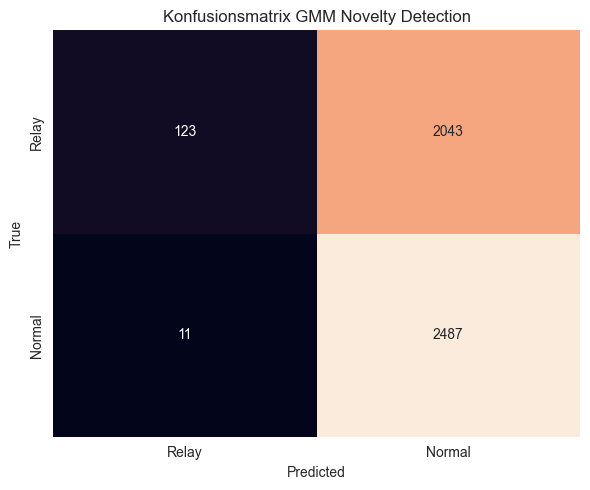

KeyboardInterrupt: 

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.lunar import LUNAR

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3}:
    clf = LUNAR(contamination=0.01, n_neighbours=n)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.90      0.74      2498
       Relay       0.76      0.38      0.51      2166

    accuracy                           0.66      4664
   macro avg       0.69      0.64      0.62      4664
weighted avg       0.69      0.66      0.63      4664



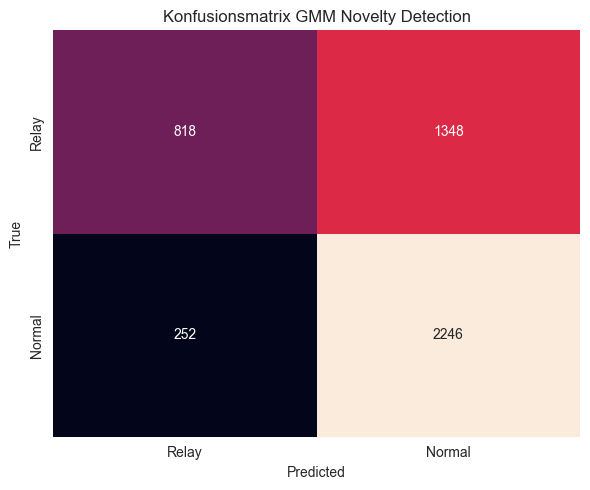

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2498
       Relay       0.90      0.09      0.17      2166

    accuracy                           0.57      4664
   macro avg       0.73      0.54      0.44      4664
weighted avg       0.72      0.57      0.46      4664



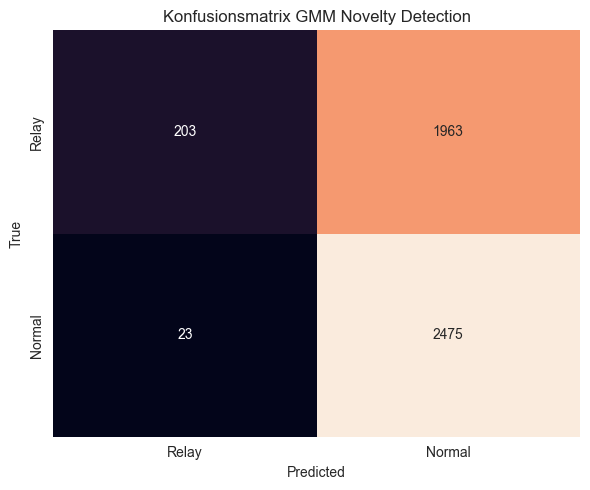

'SCALED DATEN AM BESTEN'

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.lunar import LUNAR

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3}:
    clf = LUNAR(contamination=0.01, n_neighbours=n)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.63      0.92      0.74      2498
       Relay       0.79      0.37      0.50      2166

    accuracy                           0.66      4664
   macro avg       0.71      0.64      0.62      4664
weighted avg       0.70      0.66      0.63      4664



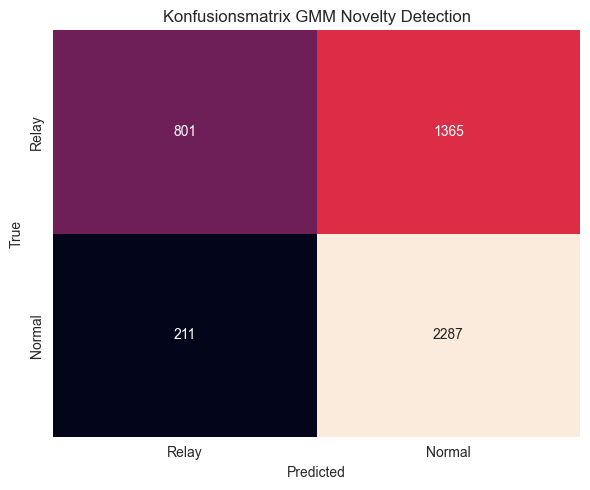

3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      1.00      0.71      2498
       Relay       0.93      0.06      0.11      2166

    accuracy                           0.56      4664
   macro avg       0.74      0.53      0.41      4664
weighted avg       0.73      0.56      0.43      4664



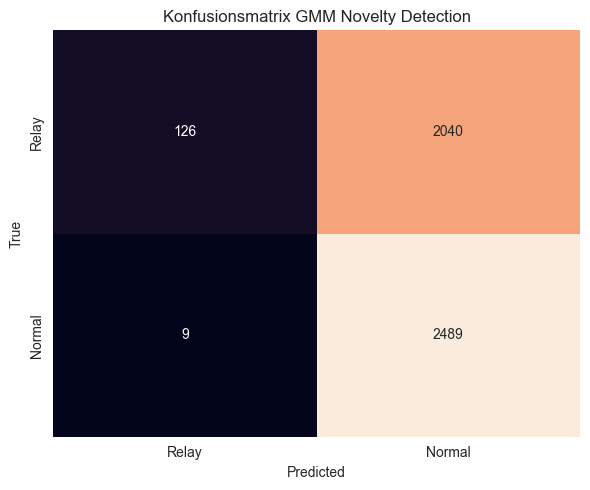

'SCALED DATEN AM BESTEN'

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.lunar import LUNAR

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 2498 Normal
X_test_relay          = dataset_relay[47500:]        # 2166 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3}:
    clf = LUNAR(contamination=0.01, n_neighbours=n, model_type="SCORE")
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(n)
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""